In [ ]:
Task_1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
customers.head(10)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


In [4]:
products.head(10)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
8,P009,BookWorld Wall Art,Home Decor,325.01
9,P010,ComfortLiving Smartwatch,Electronics,350.13


In [5]:
transactions.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68


In [6]:
# Exploring some Basic Information and Structure
print("\nCustomers Info:\n")
customers.info()


Customers Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
print("\nProducts Info:\n")
products.info()


Products Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [8]:
print("\nTransactions Info:\n")
transactions.info()


Transactions Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [9]:
#Although there are no null values for a particular field, we will still check for any missing values.
print("\nMissing Values in Customers:\n", customers.isnull().sum())
print("\nMissing Values in Products:\n", products.isnull().sum())
print("\nMissing Values in Transactions:\n", transactions.isnull().sum())


Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
# Descriptive Statistics
print("\nCustomers Statistics:\n", customers.describe(include='all'))
print("\nProducts Statistics:\n", products.describe(include='all'))
print("\nTransactions Statistics:\n", transactions.describe())


Customers Statistics:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Statistics:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN            

In [11]:
# Data Cleaning
# Although the format is already consistent, we will still convert the dates to the datetime format.
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], format='%Y-%m-%d', errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [12]:
customers.head(10)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


In [13]:
transactions.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68


In [14]:
# Merge datasets for deeper analysis
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

In [15]:
merged_data.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68,Anna Ball,South America,2022-05-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68,Jeremy Mclaughlin,South America,2024-09-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,David Li,North America,2024-01-13,ComfortLiving Bluetooth Speaker,Electronics,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68,Miguel Wong,North America,2024-01-30,ComfortLiving Bluetooth Speaker,Electronics,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68,Robert Jones,South America,2023-04-19,ComfortLiving Bluetooth Speaker,Electronics,300.68


Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


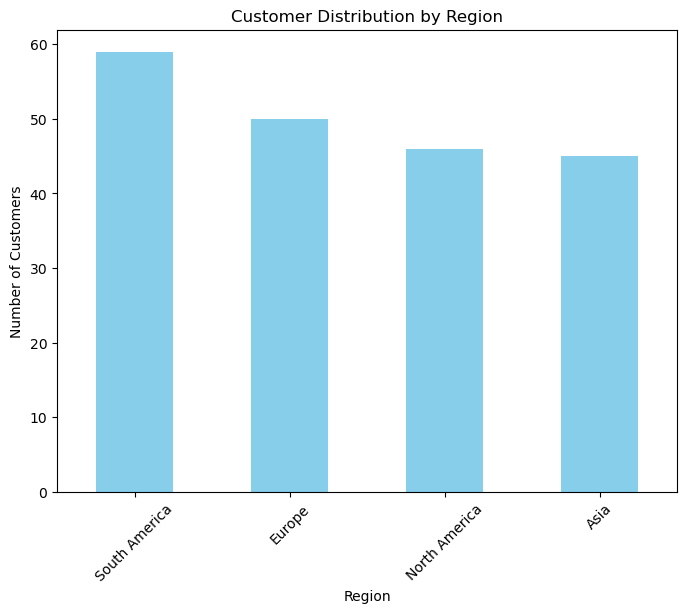

In [16]:
# EDA Visualizations
# 1. Customer distribution by region

# Customer distribution by region as a table
region_counts = customers['Region'].value_counts()
print("Customer Distribution by Region:")
print(region_counts)

# Customer distribution by region as a visualizations
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

**Customer Distribution by Region**:
   - South America leads with 59 customers, followed by Europe (50), North America (46), and Asia (45). This distribution suggests that South America holds the largest customer base, indicating a strategic focus on this region while ensuring balanced attention to other regions with considerable customer presence.

Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


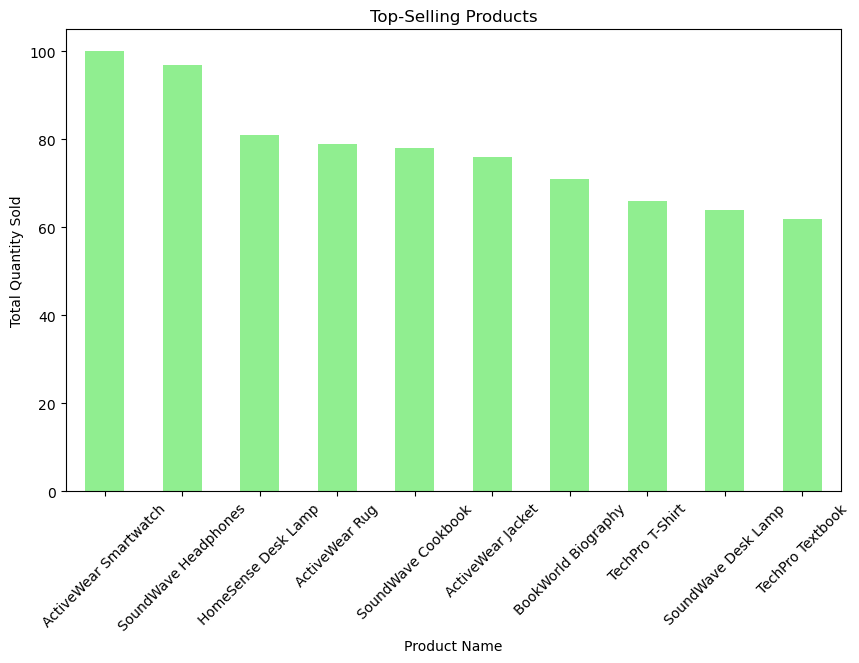

In [18]:
# 2. Top-selling products

# Top-selling products as a table
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top-Selling Products:")
print(top_products)

# Top-selling products as a visualizations
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='lightgreen')
plt.title('Top-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

**Top-Selling Products**:
   - The "ActiveWear Smartwatch" tops the list with 100 units sold, closely followed by "SoundWave Headphones" (97 units). Other high-performing products include "HomeSense Desk Lamp" (81 units) and "ActiveWear Rug" (79 units), reflecting a strong demand for electronics, home decor, and accessories.

Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


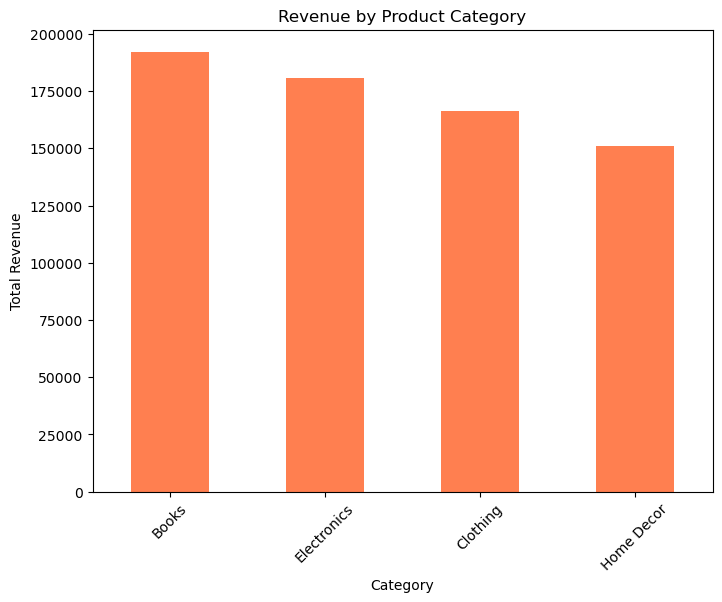

In [20]:
# 3. Revenue by category

#Revenue by category as a table
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Product Category:")
print(category_revenue)

#Revenue by category as a visualizations
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_revenue.plot(kind='bar', color='coral')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**Revenue by Product Category**:
   - The "Books" category generates the highest revenue at ₹192,147.47, followed by "Electronics" at ₹180,783.50. "Clothing" and "Home Decor" contribute ₹166,170.66 and ₹150,893.93, respectively, highlighting the dominance of Books and Electronics in revenue generation.

Transactions Over Time:
TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


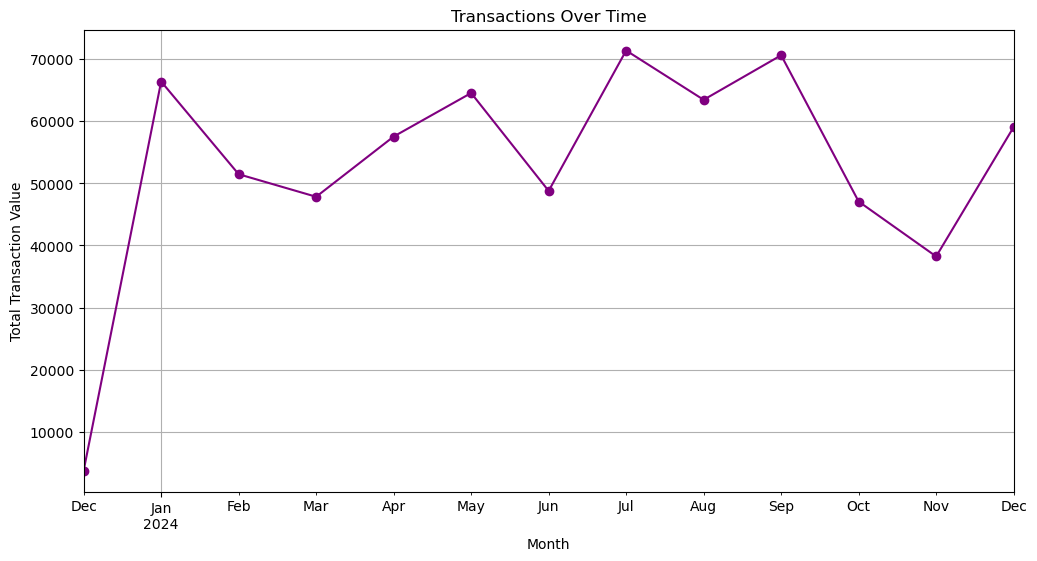

In [22]:
# 4. Transactions over time

# Transactions over time as a table
transactions_over_time = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("Transactions Over Time:")
print(transactions_over_time)

#Transactions over time as a visualizations
transactions_over_time = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(12, 6))
transactions_over_time.plot(color='purple', marker='o')
plt.title('Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value')
plt.grid(True)
plt.show()

**Transactions Over Time**:
- The highest transaction value occurred in **January 2024** at ₹66,376.39, followed by **September 2024** with ₹70,603.75.
- **December 2023** recorded the lowest transaction value at ₹3,769.52.
- A consistent increase in transaction values can be observed from **December 2023** through **August 2024**, indicating higher sales and customer engagement during these months.
- The fluctuations in transaction values suggest seasonal trends or promotional periods that significantly impact sales performance.

Average Order Value by Region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


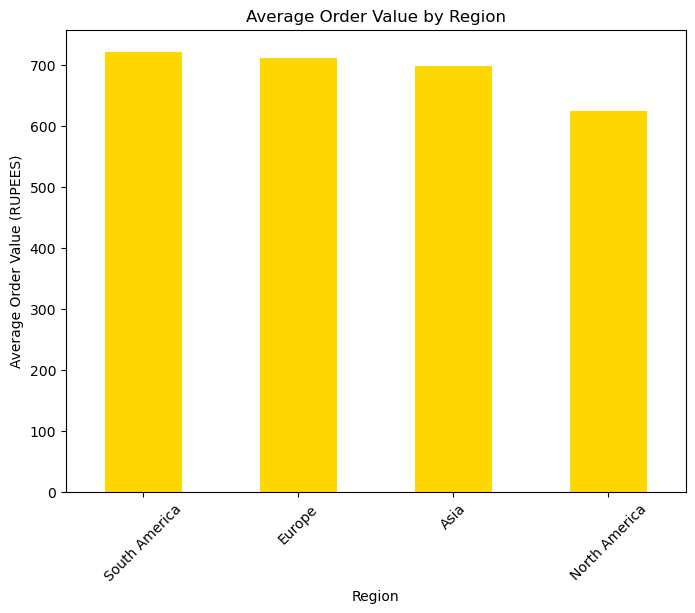

In [24]:
# 5. Average order value by region

#Average order value by region as a table
avg_order_value = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
print("Average Order Value by Region:")
print(avg_order_value)

#Average order value by region as a visualizations
avg_order_value = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
avg_order_value.plot(kind='bar', color='gold')
plt.title('Average Order Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Order Value (RUPEES)')
plt.xticks(rotation=45)
plt.show()

**Average Order Value by Region**:
- **South America** leads with the highest average order value of ₹721.55, followed closely by **Europe** at ₹710.49.
- **Asia** and **North America** have lower average order values at ₹697.59 and ₹624.24, respectively.
- This indicates that customers in South America and Europe tend to make larger purchases on average compared to other regions, which may reflect different spending behaviors or product preferences across regions.


Top 10 Customers by Total Purchase Value:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


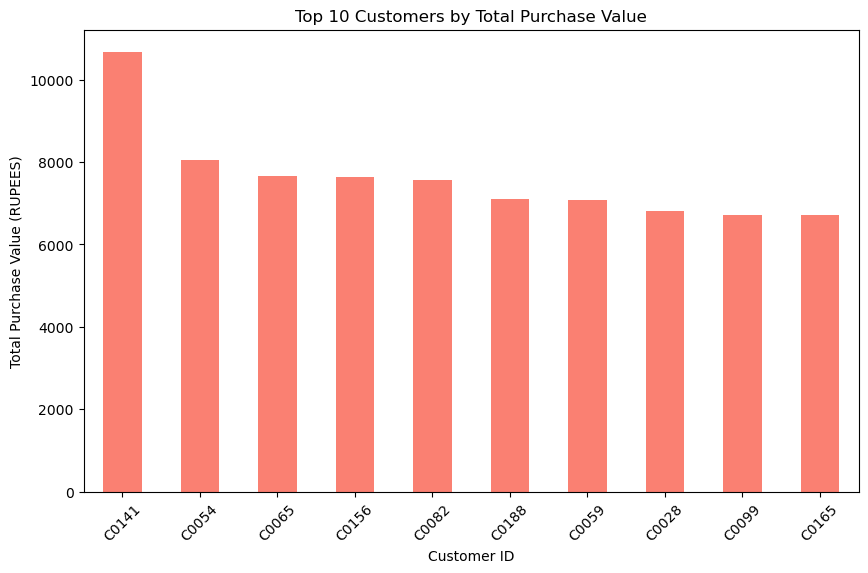

In [26]:
# 6. Customers who made the highest purchases
# Customers who made the highest purchases(Top 10) as a table
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_customers = customer_spending.head(10)
print("\nTop 10 Customers by Total Purchase Value:\n", top_customers)

# Customers who made the highest purchases(Top 10) as a visualizations
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='salmon')
plt.title('Top 10 Customers by Total Purchase Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Value (RUPEES)')
plt.xticks(rotation=45)
plt.show()


**Top 10 Customers by Total Purchase Value**:

- **Customer C0141** leads with ₹10,673.87 in total purchases.
- These high-value customers can be rewarded with exclusive **coupon codes** or **special offers** to encourage continued loyalty and boost future sales.

In [74]:
#Task 2